# **This notebook is all about the LLM Book notes**
## **Hands-On_Large_Language_Model.pdf**

## *Topic - Clustering*

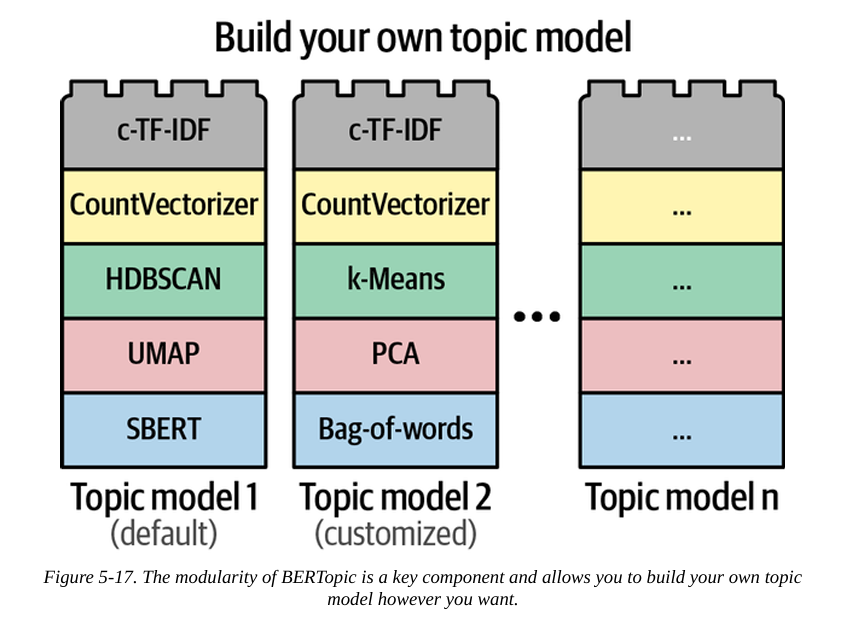

### This is how we can able to topic modelling with SBERT  and custom ML Models

### **Understanding Dimensionality Reduction in Simple Terms**  
Imagine you have a big table with tons of columns (features), but not all of them are important for making a decision. Dimensionality reduction helps in simplifying this by selecting only the most important features while keeping most of the information. Two popular methods for doing this are **Principal Component Analysis (PCA)** and **Uniform Manifold Approximation and Projection (UMAP)**.

---

### **1. Principal Component Analysis (PCA) – The "Best Angle" Method**  
Think of PCA as a way of **finding the best angle** to look at a dataset so that you can see the most patterns in the simplest way.

#### **Analogy: Choosing the Best Camera Angle**  
Imagine you're taking a photo of a car. If you take a picture from the front, you only see the headlights and grille. If you take a picture from the side, you see the doors and windows. But if you take it at an angle, you get a **better overall view** of the car with the least distortion.  

PCA does something similar:  
- It **rotates** the data to find the most informative perspective.  
- It removes less useful information while keeping the most important details.  

#### **Example:**  
Let's say we have a dataset of students with these features:  
1. **Height** (cm)  
2. **Weight** (kg)  
3. **Math Score**  
4. **Science Score**  

PCA might discover that **height and weight are strongly related** (taller people tend to weigh more). Instead of treating them separately, PCA creates a **new variable (principal component)** that combines them in a way that keeps most of the information. Instead of 4 columns, we might reduce it to just **2 or 3** important ones.

---

### **2. Uniform Manifold Approximation and Projection (UMAP) – The "Map Maker" Method**  
UMAP is useful when data has **hidden structures** that can’t be seen easily.

#### **Analogy: Flattening a Globe into a Map**  
Imagine you have a **globe** and you want to turn it into a **flat map**. You have to keep continents in the correct shape while reducing the 3D world to 2D. Some distortions will happen, but you still get a useful map.  

UMAP works similarly:  
- It understands how data points are **connected** in high dimensions.  
- It **projects** them into fewer dimensions while keeping their relationships intact.  

#### **Example:**  
Suppose we have **thousands of images** of handwritten digits (0-9). Each image has **784 features** (28×28 pixels).  
- PCA would try to compress the data by **removing less useful information**.
- UMAP, however, **preserves clusters better**, meaning **digits that look similar stay grouped together**.

This is why UMAP is often preferred for **visualization tasks**, like clustering images or texts.

---

### **Key Differences**  
| Feature | PCA | UMAP |
|---------|-----|------|
| Type | Linear | Non-linear |
| Goal | Find best projection | Keep structure of data |
| Best For | Compression, feature reduction | Clustering, visualization |
| Speed | Fast | Slower but effective for complex data |

---

### **Final Thought**  
- **Use PCA** when you want a simple, fast way to reduce dimensions while keeping most of the information.  
- **Use UMAP** when your data has **complex relationships** and you want to preserve those patterns better.  




---

# **1️⃣ Count Vectorizer (Simple Word Counting)**
## **Layman Explanation**
Imagine you have two documents:  

1️⃣ **"I love Python and Machine Learning."**  
2️⃣ **"Machine Learning is great with Python."**  

If we treat each document like a **shopping list** 🛒, we simply count how many times each word appears, just like counting how many times you bought an item.  

For example:  
- "Python" appears **once** in both documents.  
- "Machine" appears **once** in both documents.  
- "I" appears only in the first document.  

Thus, we create a table (word matrix) that counts occurrences:

| Word           | Document 1 | Document 2 |
|---------------|-----------|-----------|
| **I**         | 1         | 0         |
| **love**      | 1         | 0         |
| **Python**    | 1         | 1         |
| **and**       | 1         | 0         |
| **Machine**   | 1         | 1         |
| **Learning**  | 1         | 1         |
| **is**        | 0         | 1         |
| **great**     | 0         | 1         |
| **with**      | 0         | 1         |

👉 **Simple Concept:** Just counting words!  

---

## **Mathematical Explanation**
Let **\( X \)** be the matrix where \( X_{ij} \) represents the count of word **\( w_j \)** in document **\( d_i \)**:

\[
X_{ij} = \text{count}(w_j \text{ in } d_i)
\]

For example, in **Document 1**, "Python" appears once:  
\[
X_{11} = 1
\]  
For **Document 2**, "great" appears once:  
\[
X_{28} = 1
\]

📌 **Limitation:** This method **does not** consider the importance of words. A common word like "Machine" gets the same weight as "great," even though "great" may be more meaningful.

---

# **2️⃣ TF-IDF (Smart Weighting)**
## **Layman Explanation**
Think of **TF-IDF** like ranking items on your shopping list 📜:  

1️⃣ **TF (Term Frequency) → How often is this item in one list?**  
   - If you buy "Milk" **5 times** in one shopping list of 10 items, it is **important** in that list.  
   - But if you only buy "Bananas" **once**, it is less important in this list.

   \[
   TF(w, d) = \frac{\text{count}(w \text{ in } d)}{\text{total words in } d}
   \]

2️⃣ **IDF (Inverse Document Frequency) → How rare is this item across all lists?**  
   - If "Milk" appears in **every** shopping list, it is not special.  
   - If "Dragon Fruit" appears in **only one list**, it is **rare and important**.

   \[
   IDF(w) = \log \left(\frac{N}{\text{DF}(w)} + 1\right)
   \]

   where:
   - \( N \) = Total number of documents
   - \( \text{DF}(w) \) = Number of documents containing word \( w \)

3️⃣ **TF-IDF Score = TF × IDF**
   - **Common words get lower weight** (e.g., "Machine" appears in every doc).  
   - **Rare words get higher weight** (e.g., "great" appears only in one doc).  

---

## **Mathematical Explanation**
### **Step 1: Compute TF (Term Frequency)**
TF measures how often a word appears in a document.

\[
TF(w, d) = \frac{\text{count}(w \text{ in } d)}{\text{total words in } d}
\]

For **Document 2: "Machine Learning is great with Python."**  
Total words = **6**  

| Word  | Count | TF (Count / Total Words) |
|-------|-------|------------------------|
| Machine | 1 | \( 1/6 = 0.167 \) |
| Learning | 1 | \( 1/6 = 0.167 \) |
| is | 1 | \( 1/6 = 0.167 \) |
| great | 1 | \( 1/6 = 0.167 \) |
| with | 1 | \( 1/6 = 0.167 \) |
| Python | 1 | \( 1/6 = 0.167 \) |

---

### **Step 2: Compute IDF (Inverse Document Frequency)**
IDF reduces the importance of words that appear in multiple documents.

\[
IDF(w) = \log \left(\frac{N}{DF(w)} + 1 \right)
\]

where:  
- \( N = 2 \) (since we have 2 documents)  
- \( DF(w) \) = Number of documents containing the word.  

| Word      | DF (Number of Docs Containing Word) | IDF |
|----------|--------------------------------|--------------------------|
| Machine  | 2 | \( \log(2/2 + 1) = \log(2) = 0.693 \) |
| Learning | 2 | \( \log(2/2 + 1) = \log(2) = 0.693 \) |
| is       | 1 | \( \log(2/1 + 1) = \log(3) = 1.098 \) |
| great    | 1 | \( \log(2/1 + 1) = \log(3) = 1.098 \) |
| with     | 1 | \( \log(2/1 + 1) = \log(3) = 1.098 \) |
| Python   | 2 | \( \log(2/2 + 1) = \log(2) = 0.693 \) |

---

### **Step 3: Compute TF-IDF Score**
\[
TF-IDF(w, d) = TF(w, d) \times IDF(w)
\]

For **Document 2**:

| Word  | TF | IDF | TF-IDF (TF × IDF) |
|-------|----|-----|------------------|
| Machine | 0.167 | 0.693 | 0.116 |
| Learning | 0.167 | 0.693 | 0.116 |
| is | 0.167 | 1.098 | 0.184 |
| great | 0.167 | 1.098 | 0.184 |
| with | 0.167 | 1.098 | 0.184 |
| Python | 0.167 | 0.693 | 0.116 |

👉 **Insight:** Words like "great" and "with" have higher TF-IDF scores because they appear less frequently across documents.  

---

# **🔍 Summary: Count Vectorizer vs. TF-IDF**
| Feature  | Count Vectorizer | TF-IDF |
|----------|----------------|--------|
| Meaning  | Just counts words | Weights words based on importance |
| Formula  | \( X_{ij} = \text{count}(w_j \text{ in } d_i) \) | \( TF(w, d) \times IDF(w) \) |
| Handles Common Words | No | Yes, downweights them |
| Best Use Case | Simple text classification, spam detection | Search engines, keyword extraction |

🚀 **Final Thought**  
- **Use Count Vectorizer** when word frequency matters (e.g., spam detection).  
- **Use TF-IDF** when you want **important words to stand out** (e.g., search engines).  

Would you like a Python code example for both? 🤖🔥